## 5.1.2

In [4]:
function make_initial(numpeople,numchip)
    boxes = zeros(Int64,numpeople)
    for i=1:numchip
        targetbox = rand(1:numpeople)
        boxes[targetbox] += 1
    end
    return boxes
end

make_initial (generic function with 1 method)

In [2]:
function giveandtake(oldboxes)
    newboxes = copy(oldboxes)
    numpeople = length(oldboxes)
    A = rand(1:numpeople)
    B = rand(1:numpeople)
    while B == A
        B = rand(1:numpeople)
    end
    if newboxes[A] > 0
        newboxes[A] -= 1
        newboxes[B] += 1
    end
    return newboxes
end

giveandtake (generic function with 1 method)

## 5.1.3

In [5]:
using Plots
function test2()
    numpeople = 6
    numballs = 30
    numgroups = 100
    totalpeople = numpeople*numgroups
    totalboxes = zeros(Int64,numgroups,numpeople)
    for i=1:numgroups
        totalboxes[i,:] = make_initial(numpeople,numballs)
    end
    histogram(totalboxes[:],nbins = -0.5:1:numballs,label = "initial",ylims=(0,totalpeople*0.3))
    savefig("hist.png")
end
test2()


## 5.1.4

In [8]:
function test3()
    numpeople = 6
    numballs = 30
    numgroups = 100
    totalpeople = numpeople*numgroups
    totalboxes = zeros(Int64,numgroups,numpeople)
    for i=1:numgroups
        totalboxes[i,:] = make_initial(numpeople,numballs)
    end
    
    numtotal = 300
    for itrj = 1:numtotal
        for i=1:numgroups
            totalboxes[i,:] = giveandtake(totalboxes[i,:])
        end
    end
    histogram(totalboxes[:],nbins = -0.5:1:numballs,label = "$numtotal",ylims=(0,totalpeople*0.3))
    savefig("hist_300.png")
end
test3()
    
    

In [9]:
function test3()
    numpeople = 6
    numballs = 30
    numgroups = 100
    totalpeople = numpeople*numgroups
    totalboxes = zeros(Int64,numgroups,numpeople)
    for i=1:numgroups
        totalboxes[i,:] = make_initial(numpeople,numballs)
    end
    
    numtotal = 300
    anim = Animation()
    for itrj = 1:numtotal
        println("$itrj-th")
        for i=1:numgroups
            totalboxes[i,:] = giveandtake(totalboxes[i,:])
        end
        plt = histogram(totalboxes[:],nbins = -0.5:1:numballs,label = "$itrj",ylims=(0,totalpeople*0.3))
        frame(anim,plt)
    end
    gif(anim,"histplot.gif", fps = 30)
    histogram(totalboxes[:],nbins = -0.5:1:numballs,label = "$numtotal",ylims=(0,totalpeople*0.3))
    savefig("hist_300.png")
end
test3()

1-th
2-th
3-th
4-th
5-th
6-th
7-th
8-th
9-th
10-th
11-th
12-th
13-th
14-th
15-th
16-th
17-th
18-th
19-th
20-th
21-th
22-th
23-th
24-th
25-th
26-th
27-th
28-th
29-th
30-th
31-th
32-th
33-th
34-th
35-th
36-th
37-th
38-th
39-th
40-th
41-th
42-th
43-th
44-th
45-th
46-th
47-th
48-th
49-th
50-th
51-th
52-th
53-th
54-th
55-th
56-th
57-th
58-th
59-th
60-th
61-th
62-th
63-th
64-th
65-th
66-th
67-th
68-th
69-th
70-th
71-th
72-th
73-th
74-th
75-th
76-th
77-th
78-th
79-th
80-th
81-th
82-th
83-th
84-th
85-th
86-th
87-th
88-th
89-th
90-th
91-th
92-th
93-th
94-th
95-th
96-th
97-th
98-th
99-th
100-th
101-th
102-th
103-th
104-th
105-th
106-th
107-th
108-th
109-th
110-th
111-th
112-th
113-th
114-th
115-th
116-th
117-th
118-th
119-th
120-th
121-th
122-th
123-th
124-th
125-th
126-th
127-th
128-th
129-th
130-th
131-th
132-th
133-th
134-th
135-th
136-th
137-th
138-th
139-th
140-th
141-th
142-th
143-th
144-th
145-th
146-th
147-th
148-th
149-th
150-th
151-th
152-th
153-th
154-th
155-th
156-th
157-th
158-th
15

┌ Info: Saved animation to 
│   fn = /Users/yuki/git/YukiNagai/docs/src_ja/books/histplot.gif
└ @ Plots /Users/yuki/.julia/packages/Plots/SkUg1/src/animation.jl:126


## 5.1.5

In [13]:
plot();

In [14]:
function test4()
    numpeople = 6
    numballs = 30
    numgroups = 1
    numtotal = 600
    timedepboxes = zeros(Int64,numtotal,numpeople)
    timedepboxes[1,:] = make_initial(numpeople,numballs)
    for itrj = 2:numtotal
        timedepboxes[itrj,:] = giveandtake(timedepboxes[itrj-1,:])
    end
    for i=1:numpeople
        plot!(timedepboxes[:,i],label="$i")
    end
    savefig("history.png")
end
test4()

## 5.1.6

In [22]:
function make_states!(states,allstates,numpeople,numballs,i)
    if i <= length(states)
        for j=0:numballs
            states[i] = j
            make_states!(states,allstates,numpeople-sum(states),numballs,i+1)
        end
    else
        if sum(states) == numballs
            push!(allstates,copy(states))
        end
    end
end

make_states! (generic function with 1 method)

In [23]:
function test5()
    numpeople = 4
    numballs = 4
    states = zeros(Int64,numpeople)
    allstates = []
    make_states!(states,allstates,numpeople,numballs,1)
    println(allstates)
    println("Total number of states: ", length(allstates))
end
test5()

Any[[0, 0, 0, 4], [0, 0, 1, 3], [0, 0, 2, 2], [0, 0, 3, 1], [0, 0, 4, 0], [0, 1, 0, 3], [0, 1, 1, 2], [0, 1, 2, 1], [0, 1, 3, 0], [0, 2, 0, 2], [0, 2, 1, 1], [0, 2, 2, 0], [0, 3, 0, 1], [0, 3, 1, 0], [0, 4, 0, 0], [1, 0, 0, 3], [1, 0, 1, 2], [1, 0, 2, 1], [1, 0, 3, 0], [1, 1, 0, 2], [1, 1, 1, 1], [1, 1, 2, 0], [1, 2, 0, 1], [1, 2, 1, 0], [1, 3, 0, 0], [2, 0, 0, 2], [2, 0, 1, 1], [2, 0, 2, 0], [2, 1, 0, 1], [2, 1, 1, 0], [2, 2, 0, 0], [3, 0, 0, 1], [3, 0, 1, 0], [3, 1, 0, 0], [4, 0, 0, 0]]
Total number of states: 35


In [24]:
function find_state_id(states,allstates)
    id = findfirst(x -> x == states,allstates)
    return id
end

find_state_id (generic function with 1 method)

1-th
2-th
3-th
4-th
5-th
6-th
7-th
8-th
9-th
10-th
11-th
12-th
13-th
14-th
15-th
16-th
17-th
18-th
19-th
20-th
21-th
22-th
23-th
24-th
25-th
26-th
27-th
28-th
29-th
30-th
31-th
32-th
33-th
34-th
35-th
36-th
37-th
38-th
39-th
40-th
41-th
42-th
43-th
44-th
45-th
46-th
47-th
48-th
49-th
50-th
51-th
52-th
53-th
54-th
55-th
56-th
57-th
58-th
59-th
60-th
61-th
62-th
63-th
64-th
65-th
66-th
67-th
68-th
69-th
70-th
71-th
72-th
73-th
74-th
75-th
76-th
77-th
78-th
79-th
80-th
81-th
82-th
83-th
84-th
85-th
86-th
87-th
88-th
89-th
90-th
91-th
92-th
93-th
94-th
95-th
96-th
97-th
98-th
99-th
100-th
101-th
102-th
103-th
104-th
105-th
106-th
107-th
108-th
109-th
110-th
111-th
112-th
113-th
114-th
115-th
116-th
117-th
118-th
119-th
120-th
121-th
122-th
123-th
124-th
125-th
126-th
127-th
128-th
129-th
130-th
131-th
132-th
133-th
134-th
135-th
136-th
137-th
138-th
139-th
140-th
141-th
142-th
143-th
144-th
145-th
146-th
147-th
148-th
149-th
150-th
151-th
152-th
153-th
154-th
155-th
156-th
157-th
158-th
15

┌ Info: Saved animation to 
│   fn = /Users/yuki/git/YukiNagai/docs/src_ja/books/allstates.gif
└ @ Plots /Users/yuki/.julia/packages/Plots/SkUg1/src/animation.jl:126


Plots.AnimatedGif("/Users/yuki/git/YukiNagai/docs/src_ja/books/allstates.gif")
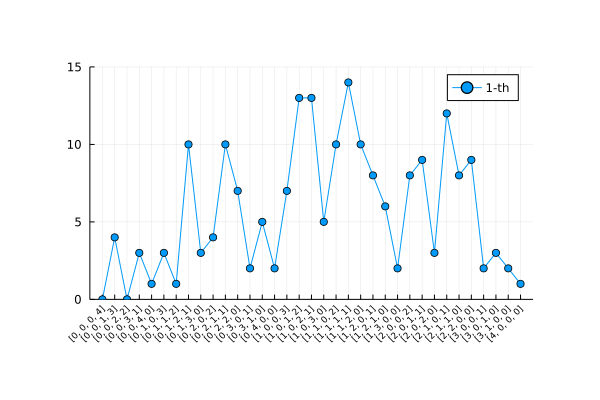

In [31]:
using Plots
using Measures
function test6()
    numpeople = 4
    numballs = 4
    states = zeros(Int64,numpeople)
    allstates = []
    make_states!(states,allstates,numpeople,numballs,1)
    numtotalstates = length(allstates)
    numstates = zeros(Int64,numtotalstates)
    numgroups  =100
    
    allstatesname = string.(allstates)
    totalpeople = numpeople*numgroups
    
    totalboxes = zeros(Int64,numgroups,numpeople)
    for i=1:numgroups
        totalboxes[i,:] = make_initial(numpeople,numballs)
        id = find_state_id(totalboxes[i,:],allstates)
        numstates[id] += 1
    end
    
    plot(numstates,xticks=(1:1:numtotalstates,allstatesname),
        xrotation = 45,xtickfontsize=6,markershape = :circle,
        margin = 15mm,label="initial",ylims=(0,maximum(numstates)+1))
    savefig("allstateinit.png")
    numtotal = 300
    anim = Animation()
    for itrj = 1:numtotal
        println("$itrj-th")
        for i=1:numgroups
            totalboxes[i,:] = giveandtake(totalboxes[i,:])
            id = find_state_id(totalboxes[i,:],allstates)
            numstates[id] += 1
        end
        plt = plot(numstates,xticks=(1:1:numtotalstates,allstatesname),
        xrotation = 45,xtickfontsize=6,markershape = :circle,
        margin = 15mm,label="$itrj-th",ylims=(0,maximum(numstates)+1))
        frame(anim,plt)
    end
    gif(anim,"allstates.gif",fps=30)
end
test6()